In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import os


In [10]:
file_path = r"C:\Users\commo\OneDrive - University of Virginia\School\STEM\CS\Coding Projects 2024\CS-Wage-Visualizer\h1b scraper\data"

In [3]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

# reverse the dictionary
states = {v: k for k, v in states.items()}

In [4]:
states.values()

dict_values(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NA', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'])

In [5]:
def preprocess(df):
    df["State"] = df["Location"].apply(lambda x: x.split(",")[-1].strip())
    df["State"] = df["State"].replace("VI", "VA")
    df = df[df["State"] != "PR"]
    df = df[df["State"] != "GU"]
    return df

def scale_df(df, coli_ratios):
    df_scaled = df.copy()
    for index, row in df.iterrows():
        try:
            df_scaled.at[index, "Salary"] = row["Salary"] * coli_ratios[row["State"]]
        except:
            pass
    return df_scaled

def plot_salary_timeseries(dfs,job_title):
    fig, ax = plt.subplots(1,2,figsize=(15, 3))
    x = []
    y = []
    postings = []
    dfs = [df for df in dfs if df.shape[0] > 0]
    for df in dfs:
        x.append(df["Year"].unique()[0])
        y.append(df["Salary"].mean())
        postings.append(df.shape[0])
    
    ax[0].set_ylim(65000, max(y) + 10000)
    ax[0].set_xlim(2015, 2023)
    ax[0].plot(x, y, label="Average Salary")
    ax[0].set_xlabel("Year")
    ax[0].set_ylabel("Salary")

    ax[1].set_ylim(0, max(postings) + 100)
    ax[1].set_xlim(2015,2023)
    ax[1].plot(x, postings, label="Number of H1B Visa Hires")
    ax[1].set_xlabel("Year")
    ax[1].set_ylabel("H1B Visa Hires")

    plt.suptitle(f"{job_title} Salary and H1B Visa Hires")
    plt.show()

def plot_barplots(df, job_title):
    # barplots for scaled cost of living by state
    plt.figure(figsize=(5, 3))
    df.groupby("State")["Salary"].mean().sort_values(ascending=False).head(10).plot(kind="bar")
    plt.title(f"Average {job_title} Salary by State")
    plt.xlabel("State")
    plt.ylabel("Salary")
    plt.show()

def plot_treemap(current_dfs):
    rows = []
    for df in current_dfs:
        mean_salary = df["Salary"].mean()
        job_title = df["Job"].unique()[0]
        rows.append([job_title, mean_salary])
    df = pd.DataFrame(rows, columns=["Job", "Salary"])
    df = df.sort_values(by="Salary", ascending=False)
    fig = px.treemap(df, path=["Job"], values="Salary")
    fig.update_layout(height=800)
    fig.show()
    

        

In [6]:
coli_json = pd.read_json('../coli.json')

coli_json["state"] = coli_json["state"].map(states)
coli_json["coli_ratio"] = 100 / coli_json["CostOfLivingIndex2023"]
coli_scale = {}
for index, row in coli_json.iterrows():
    coli_scale[row["state"]] = row["coli_ratio"]
coli_json.head(5)

,state,CostOfLivingIndex2023,CostOfLivingIndexGroceryCostsIndex,CostOfLivingIndexHealthCostsIndex,CostOfLivingIndexHousingCostsIndex,CostOfLivingIndexMiscCostsIndex,CostOfLivingIndexTransportationCostsIndex,CostOfLivingIndexUtilityCostsIndex,coli_ratio
0,AL,88.8,96.4,86.9,70.4,96.2,92.0,103.6,1.126126
1,AK,124.4,127.4,149.8,118.1,118.8,121.9,148.1,0.803859
2,AZ,107.2,101.8,93.5,125.3,102.1,99.2,94.3,0.932836
3,AR,90.3,95.4,87.2,76.3,99.1,92.2,91.8,1.107420
4,CA,134.5,112.3,106.4,186.5,110.9,124.1,124.8,0.743494


In [8]:
with open(r"C:\Users\commo\OneDrive - University of Virginia\School\STEM\CS\Coding Projects 2024\CS-Wage-Visualizer\h1b scraper\jobs_to_scrape.txt") as f:
    jobs = f.readlines()
    jobs = [x.strip().split(":")[0] for x in jobs]
    size = len(jobs)
    print(size)

20


In [11]:
jobs_dfs = []
for job in jobs:
    job_dfs = []
    print(f'Processing {job}')
    for folder in os.listdir(file_path):
        for year in range(2015, 2024):
            if str(year) in folder:
                for file in os.listdir(f"{file_path}\\{folder}"):
                    if job in file:
                        df = pd.read_csv(f"{file_path}\\{folder}\\{file}")
                        df["Year"] = year
                        job_dfs.append(df)
                        break
    jobs_dfs.append(job_dfs)

Processing Machine Learning
Processing Artifical Intelligence
Processing Data Science
Processing Data Analyst
Processing Data Engineer
Processing Graphics
Processing AR VR
Processing Deep Learning
Processing Cybersecurity Engineer
Processing Security Engineer
Processing Embedded Systems Engineer
Processing Full-Stack Developer
Processing Front-end Developer
Processing DevOps Engineer
Processing Cloud Architect
Processing Software Architect
Processing Data Architect
Processing Project Manager
Processing QA Engineer
Processing Mobile Developer


In [12]:
for i in range(len(jobs_dfs)):
    for j in range(len(jobs_dfs[i])):
        jobs_dfs[i][j] = preprocess(jobs_dfs[i][j])
        jobs_dfs[i][j] = scale_df(jobs_dfs[i][j], coli_scale)

In [13]:
current_dfs = []
for job_dfs in jobs_dfs:
    # current = -1
    current_dfs.append(job_dfs[-1])

### Time Series

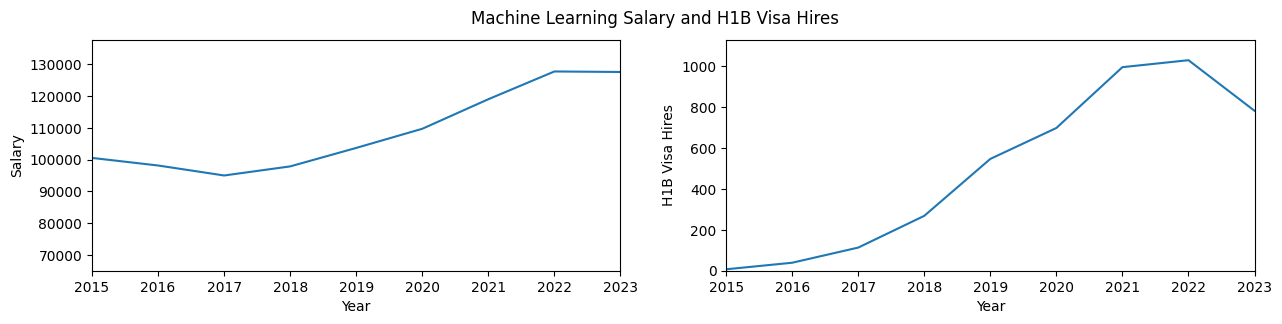

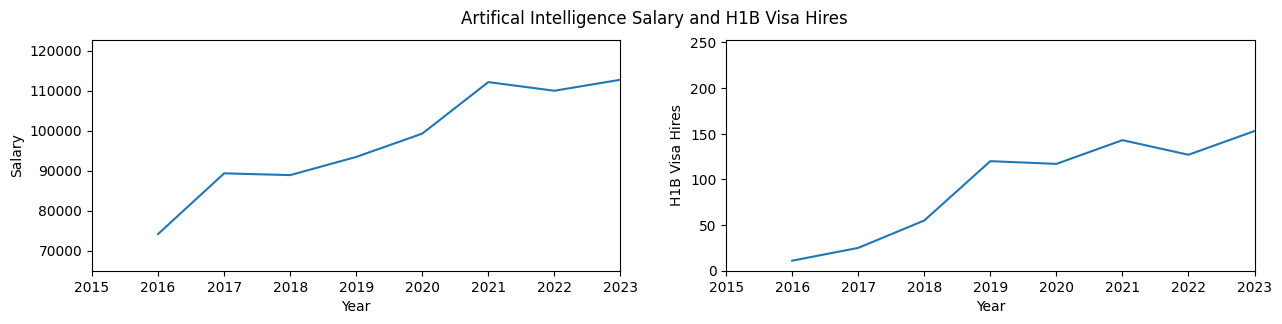

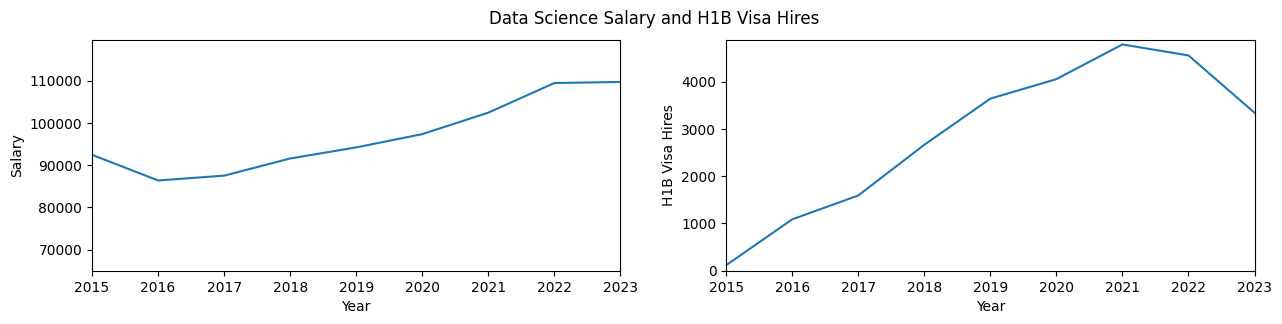

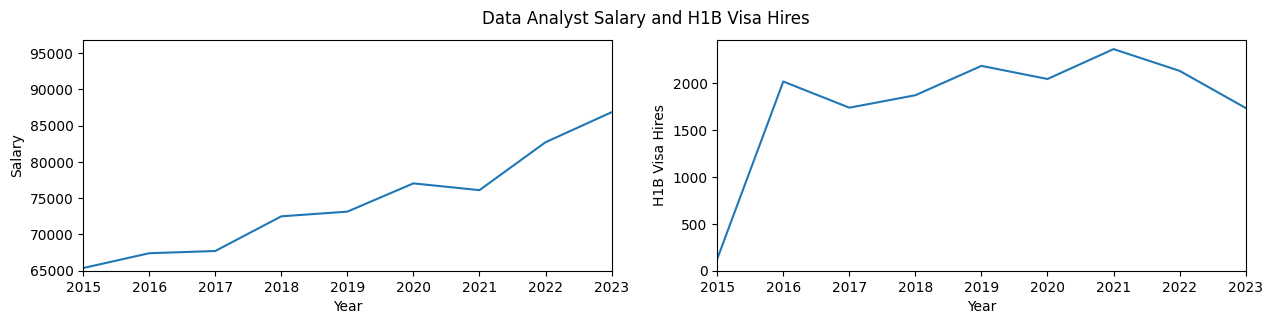

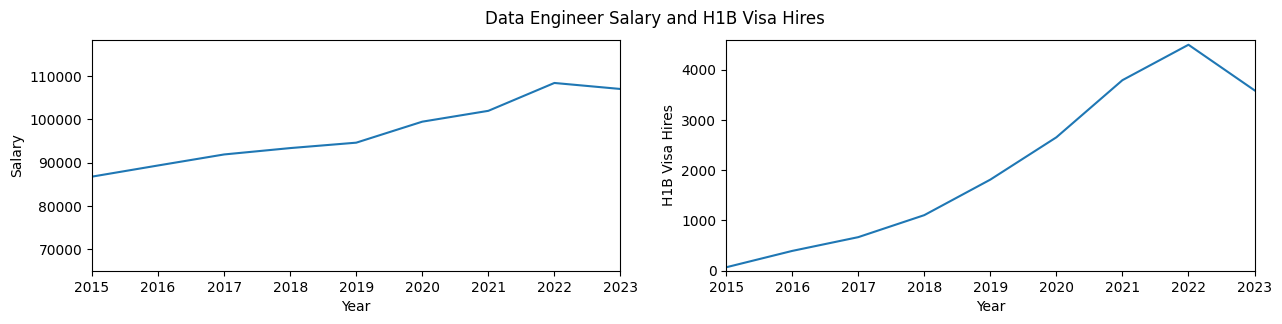

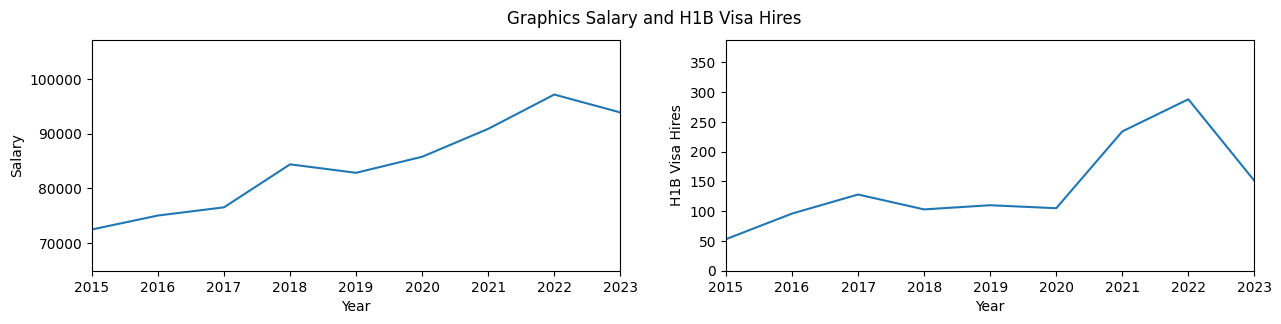

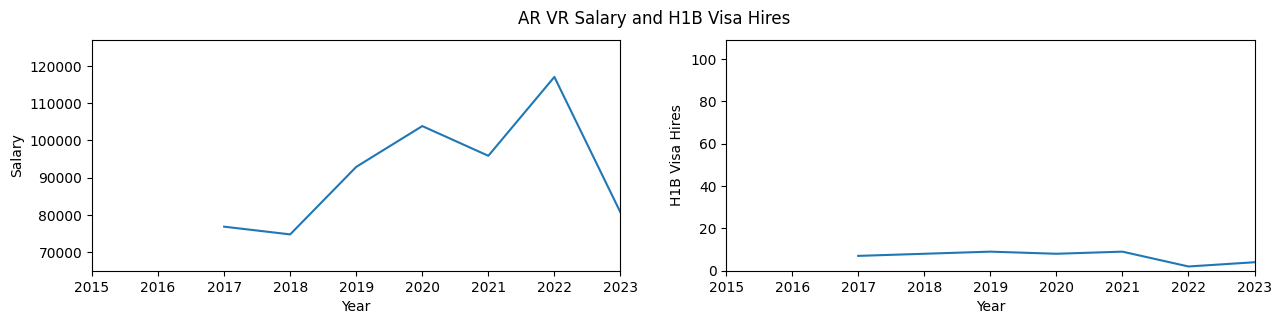

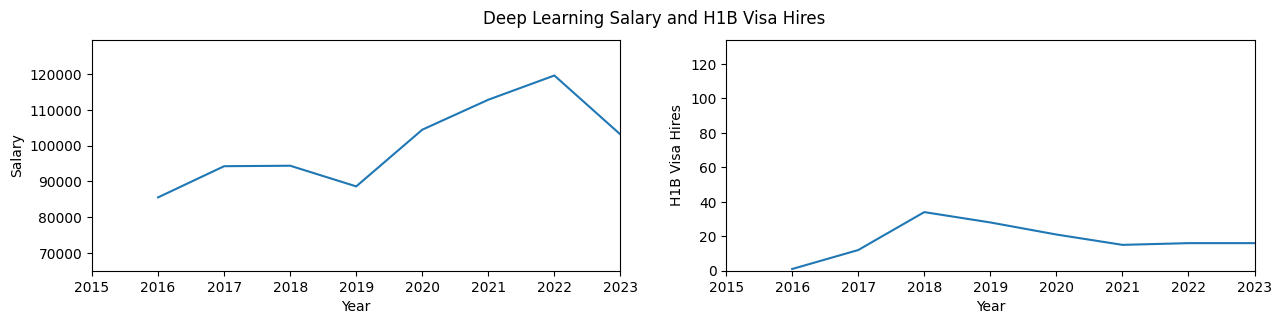

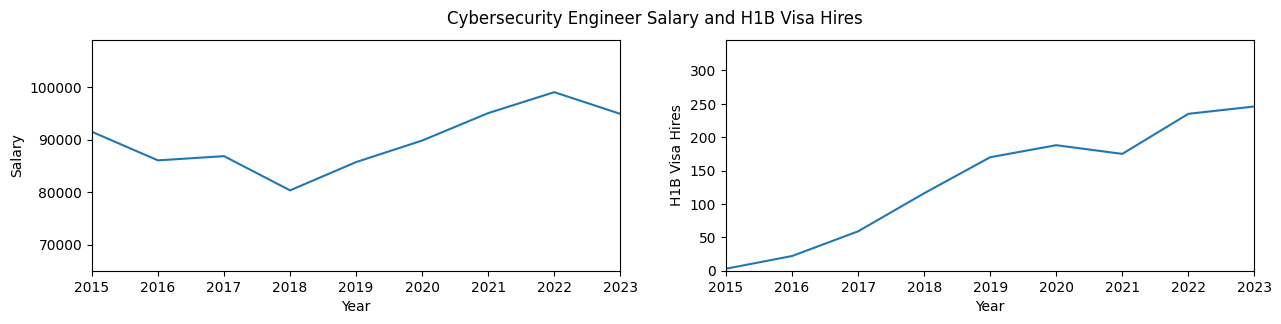

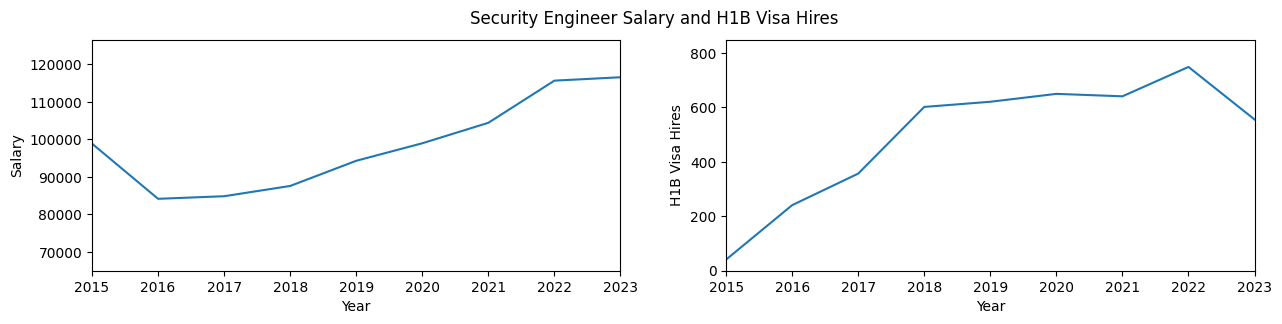

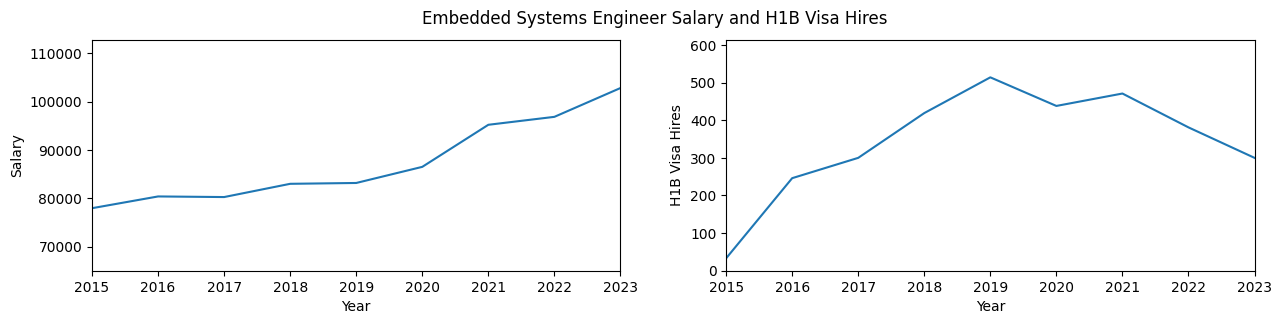

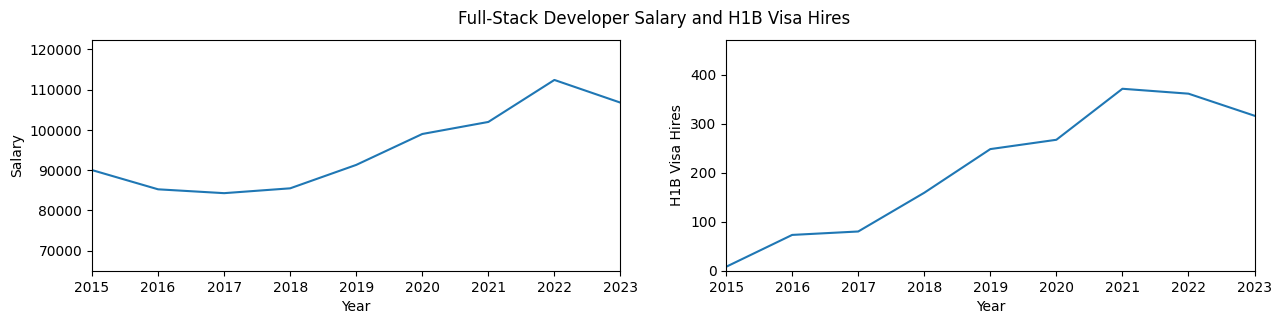

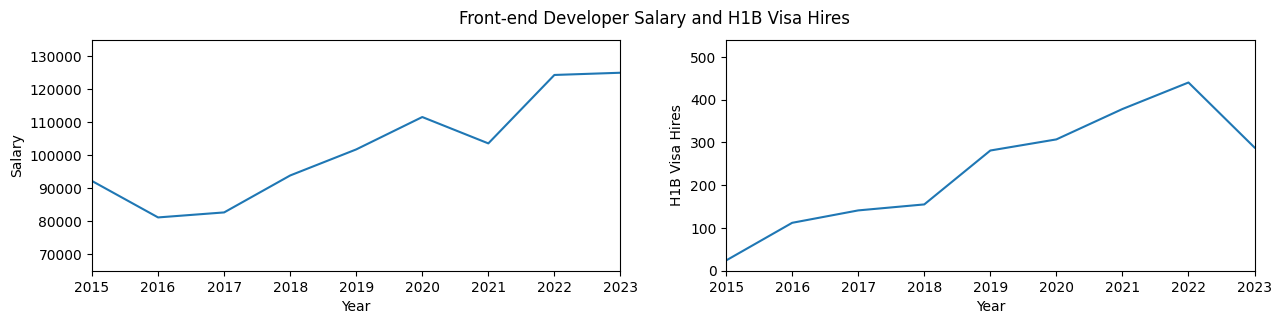

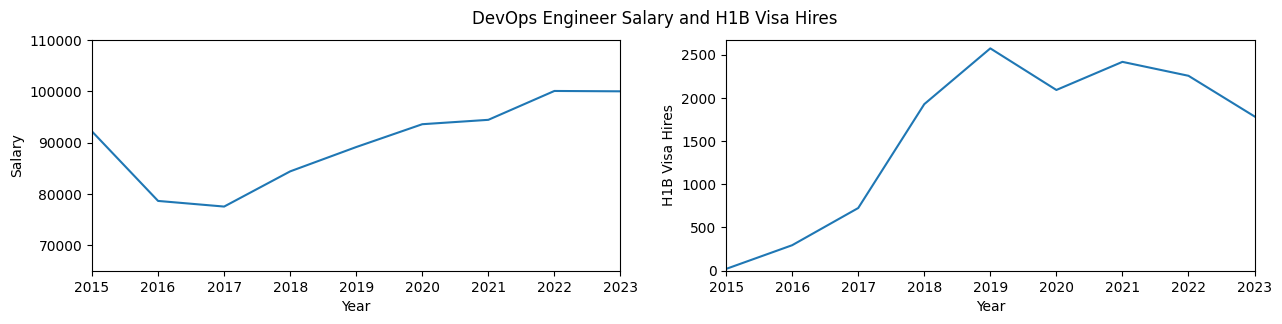

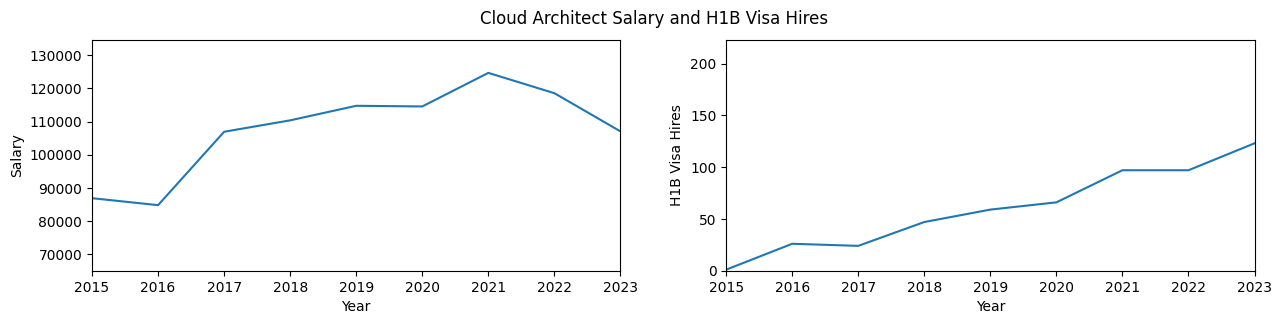

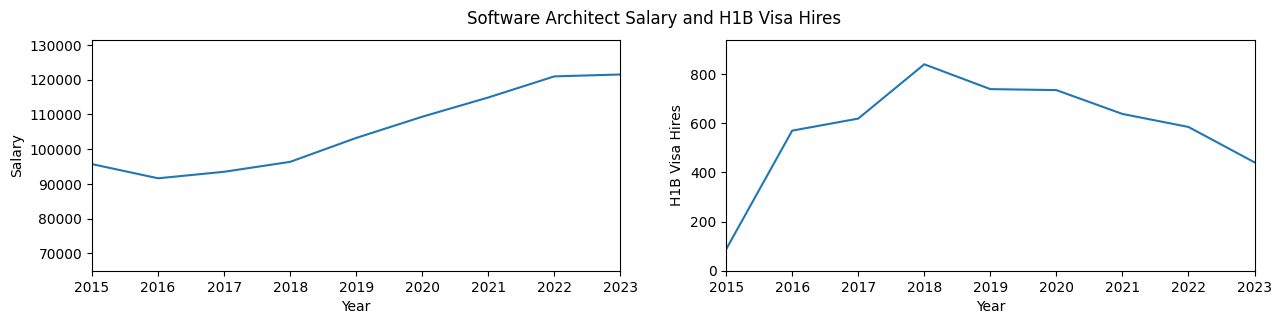

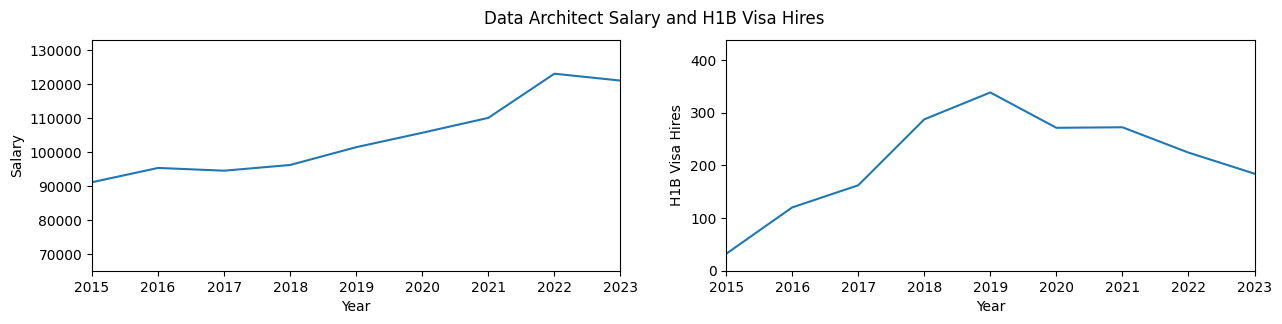

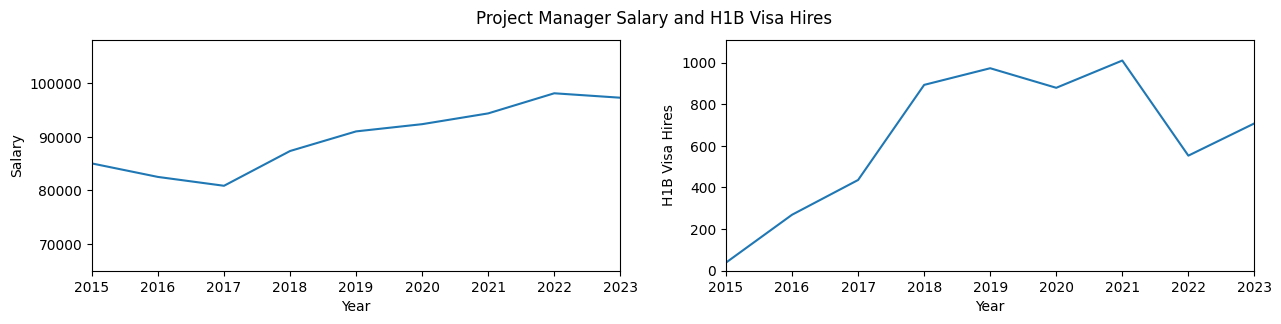

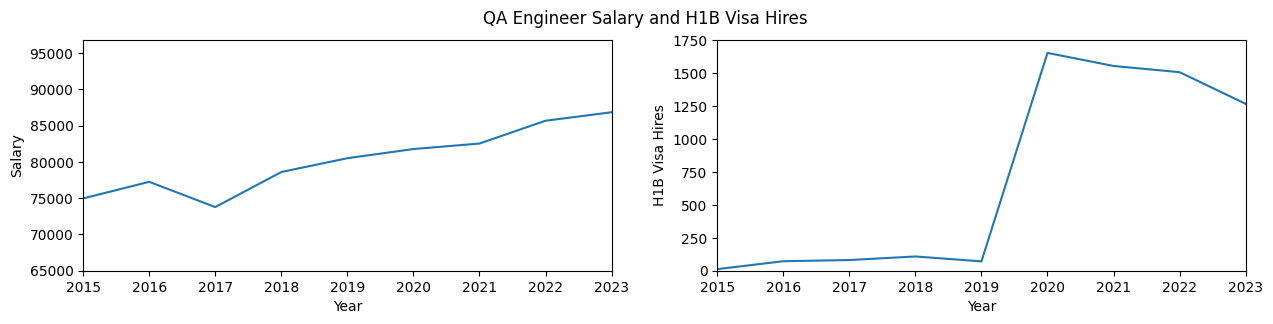

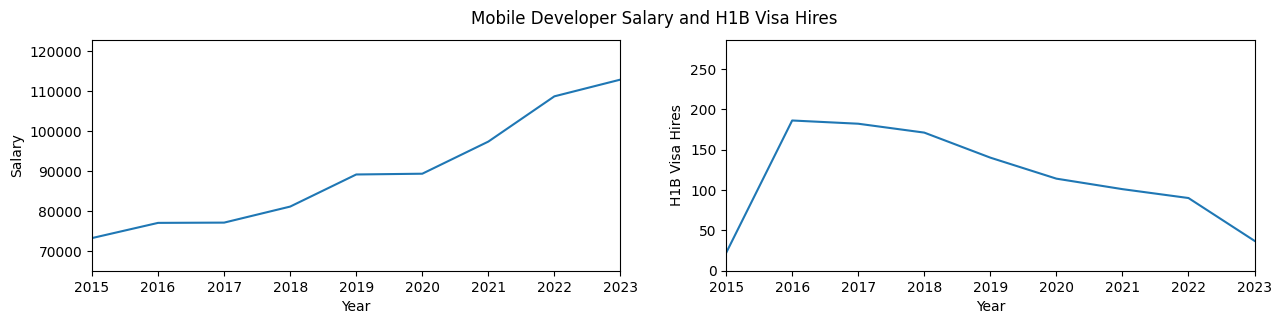

In [14]:
for i in range(len(jobs_dfs)):
    plot_salary_timeseries(jobs_dfs[i], jobs[i])

### Barplots

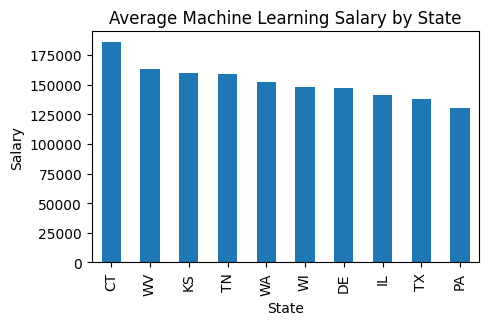

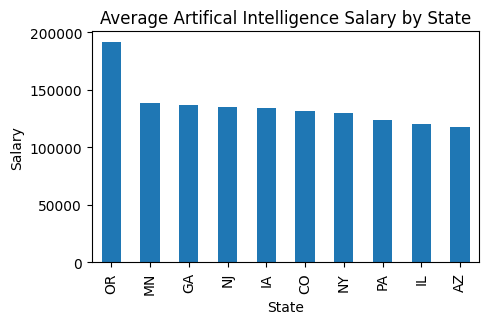

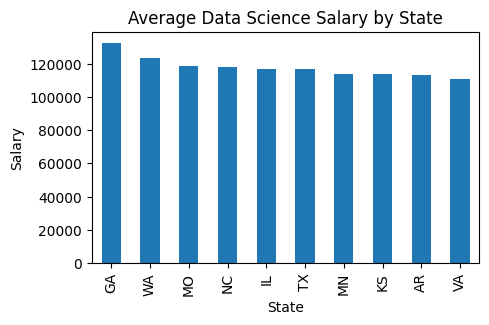

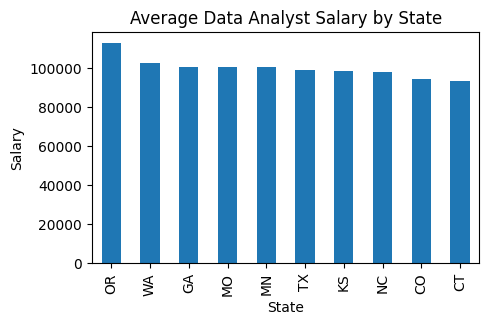

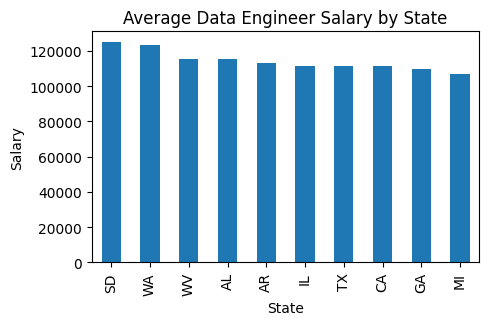

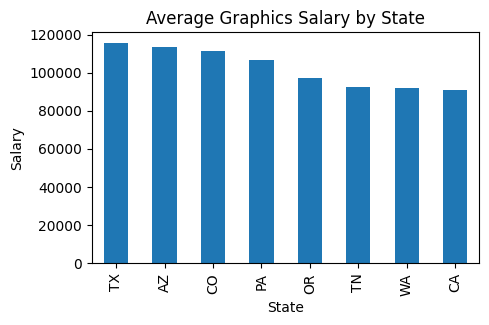

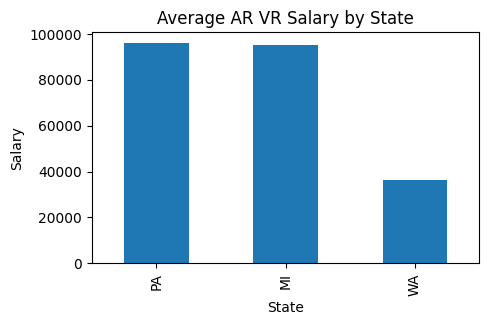

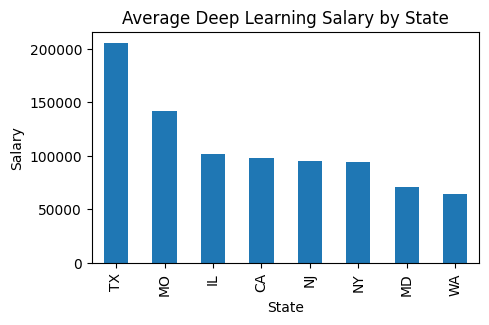

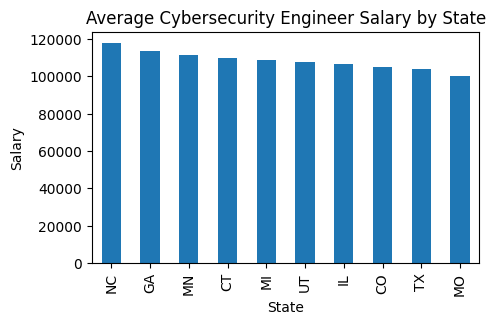

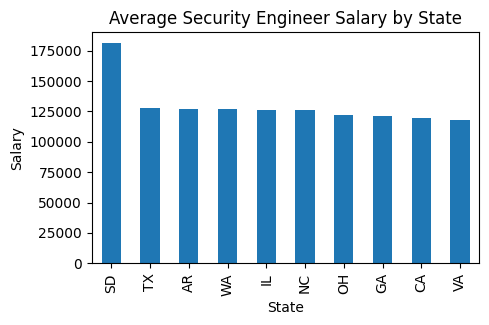

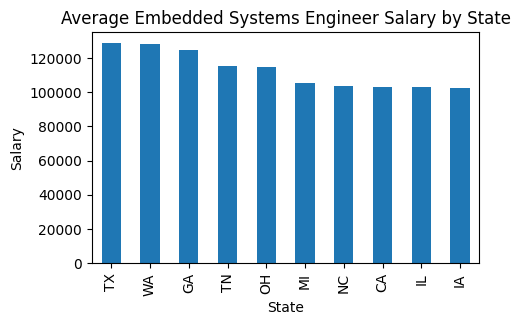

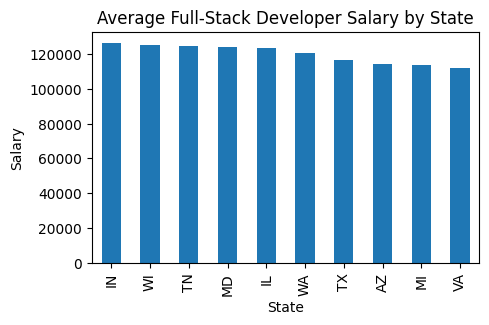

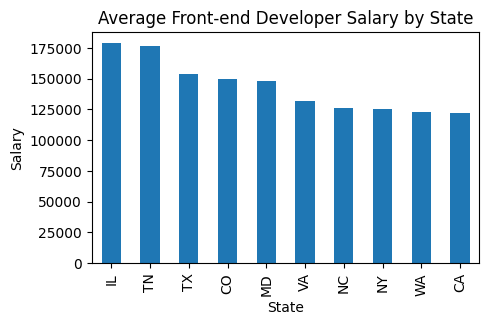

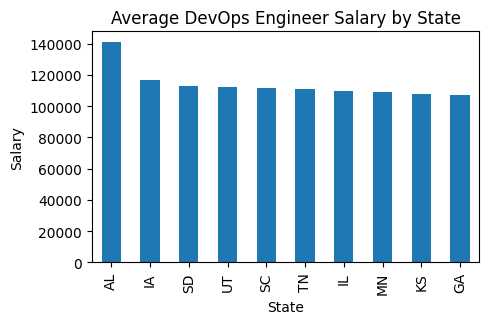

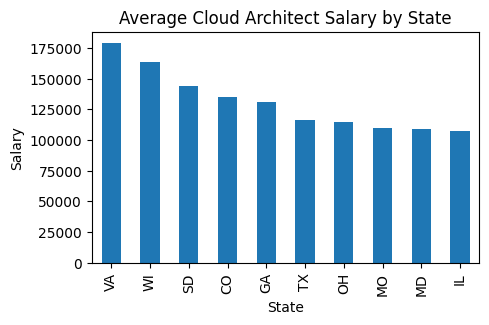

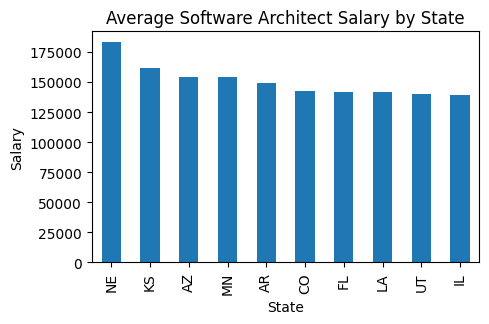

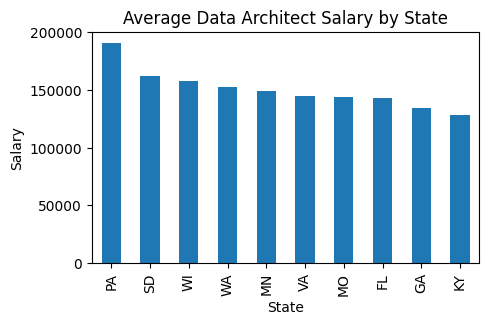

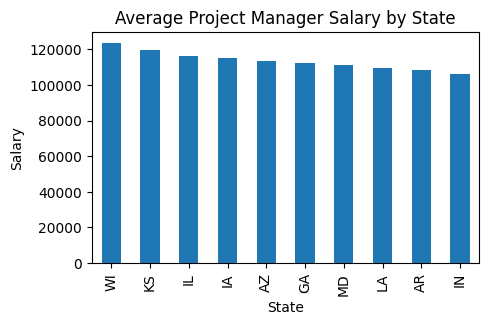

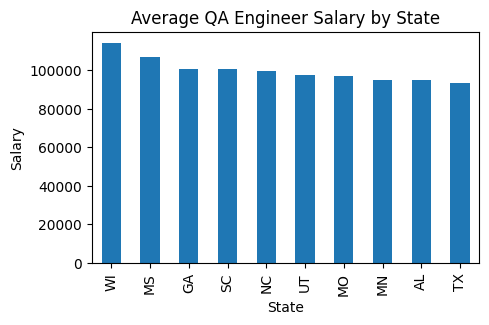

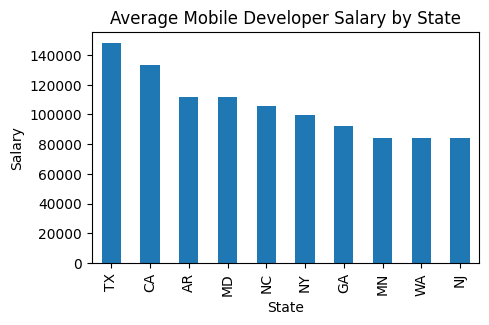

In [ ]:
for i,df in enumerate(current_dfs):
    plot_barplots(df, jobs[i])

### Treemap

In [ ]:
plot_treemap(current_dfs)